## Data Explorations and Preprocessing

### Libraries import and data loading

In [1]:
# General Libraries:
import os
from PIL import Image
import numpy as np
from sklearn.utils import shuffle
from collections import Counter

# Libraries for Data Vizualization:
import matplotlib.pyplot as plt

In [2]:
def load_data(directory):
    images = []
    labels = []

    for label in os.listdir(directory):
        for image in os.listdir(os.path.join(directory, label)):
            img_path = os.path.join(directory, label, image)

            # Read and resize the image using Pillow
            img = Image.open(img_path)
            img_array = np.array(img)

            # Append the image array and the label to the lists
            images.append(img_array)
            labels.append(label)

    # Shuffle the arrays using sklearn.utils.shuffle
    images, labels = shuffle(images, labels, random_state=42)

    return images, labels

In [3]:
train_dir = r'C:\Users\andmpereira\OneDrive - Grupo Jerónimo Martins\Documentos\GitHub\DLNN-Group2\00 - Dataset\Training'
test_dir = r'C:\Users\andmpereira\OneDrive - Grupo Jerónimo Martins\Documentos\GitHub\DLNN-Group2\00 - Dataset\Testing'

In [4]:
# Load training data
train_images, train_labels = load_data(train_dir)

# Load testing data
test_images, test_labels = load_data(test_dir)


### First Data Explorations

1) Create a function to display a grid with some images to get the sense of the variety of the images available.
2) Order by tumor type so that we understand the main diferences

In [21]:
def plot_images_by_class(images, labels, class_names, images_per_class=4):
    unique_classes = np.unique(labels)

    num_classes = len(unique_classes)
    fig, axes = plt.subplots(num_classes, images_per_class, figsize=(15, 3 * num_classes))

    for i, class_name in enumerate(unique_classes):
        class_images = [img for img, label in zip(images, labels) if label == class_name]
        class_images = class_images[:images_per_class]

        for j in range(images_per_class):
            axes[i, j].imshow(class_images[j])
            axes[i, j].set_title(f"Tumor: {class_name}")
            axes[i, j].axis("off")

    plt.tight_layout()

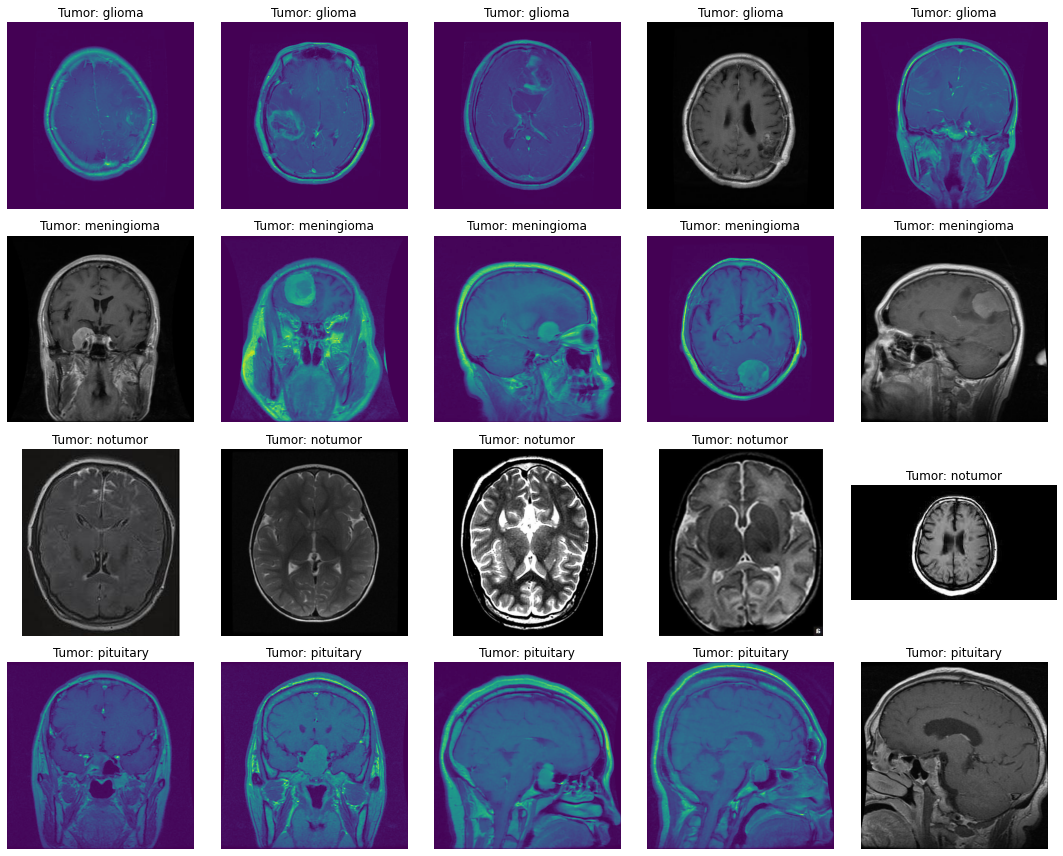

In [22]:
class_names = ['pituitary', 'notumor', 'meningioma', 'glioma']

plot_images_by_class(train_images, train_labels, class_names, images_per_class=5)


In [25]:
# Check if there any missing data

num_train_images = len(train_images)
num_test_images = len(test_images)
num_train_labels = len(train_labels)
num_test_labels = len(test_labels)

print("Number of Images in Train Set:", num_train_images)
print("Number of Labels in Train Set:", num_train_labels)
print("Number of Images in Test Set:", num_test_images)
print("Number of Labels in Test Set:", num_test_labels)

Number of Images in Train Set: 5712
Number of Labels in Train Set: 5712
Number of Images in Test Set: 1311
Number of Labels in Test Set: 1311


In [8]:
# Get the number of occurrences of each label in the training and testing sets
train_label_counts = {label: train_labels.count(label) for label in set(train_labels)}
test_label_counts = {label: test_labels.count(label) for label in set(test_labels)}

# Define colors for each label
label_colors = {'pituitary': '#BBDEF0', 'notumor': '#00A6A6', 'meningioma': '#EFCA08', 'glioma': '#F49F0A'}


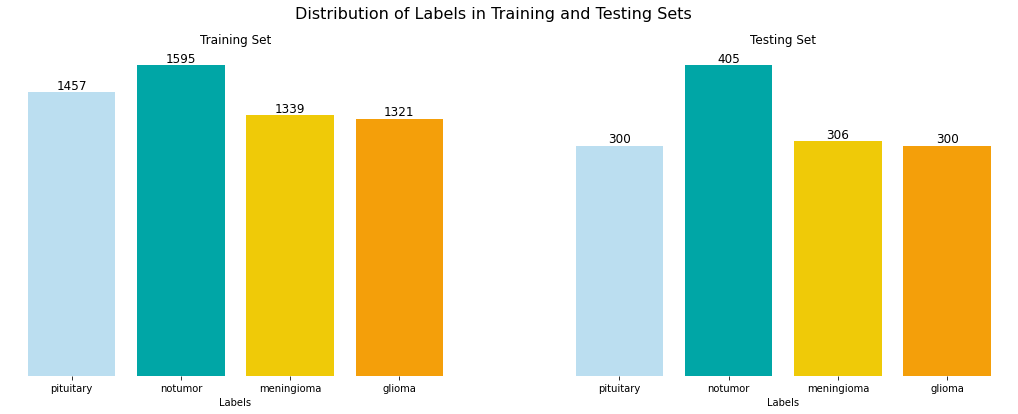

In [9]:
# Plot the side-by-side bar charts for both training and testing sets
fig, axs = plt.subplots(1, 2, figsize=(18, 6))
fig.suptitle('Distribution of Labels in Training and Testing Sets', fontsize=16)

# Training Set Bar Chart
for label, count in train_label_counts.items():
    axs[0].bar(label, count, color=label_colors[label])
    axs[0].text(label, count + 0.1, str(count), ha='center', va='bottom', fontsize=12, color='black')

axs[0].set_title('Training Set')
axs[0].set_xlabel('Labels')
axs[0].get_yaxis().set_visible(False)
axs[0].spines['top'].set_visible(False)
axs[0].spines['right'].set_visible(False)
axs[0].spines['bottom'].set_visible(False)
axs[0].spines['left'].set_visible(False)

# Testing Set Bar Chart
for label, count in test_label_counts.items():
    axs[1].bar(label, count, color=label_colors[label])
    axs[1].text(label, count + 0.1, str(count), ha='center', va='bottom', fontsize=12, color='black')

axs[1].set_title('Testing Set')
axs[1].set_xlabel('Labels')
axs[1].get_yaxis().set_visible(False)
axs[1].spines['top'].set_visible(False)
axs[1].spines['right'].set_visible(False)
axs[1].spines['bottom'].set_visible(False)
axs[1].spines['left'].set_visible(False)


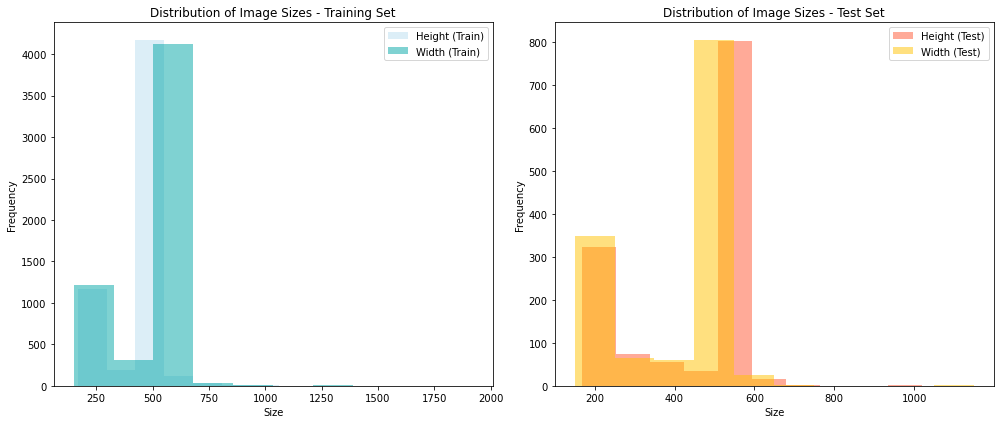

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have the train_images and test_images arrays defined somewhere

# Calculate image sizes for the training set
train_image_sizes = np.array([img.shape[:2] for img in train_images])

# Calculate image sizes for the test set
test_image_sizes = np.array([img.shape[:2] for img in test_images])

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Visualize image size distribution for the training set
ax1.hist(train_image_sizes[:, 0], bins=10, alpha=0.5, label='Height (Train)', color='#BBDEF0')
ax1.hist(train_image_sizes[:, 1], bins=10, alpha=0.5, label='Width (Train)', color='#00A6A6')
ax1.set_title('Distribution of Image Sizes - Training Set')
ax1.set_xlabel('Size')
ax1.set_ylabel('Frequency')
ax1.legend()

# Visualize image size distribution for the test set
ax2.hist(test_image_sizes[:, 0], bins=10, alpha=0.5, label='Height (Test)', color='#FF5733')
ax2.hist(test_image_sizes[:, 1], bins=10, alpha=0.5, label='Width (Test)', color='#FFC300')
ax2.set_title('Distribution of Image Sizes - Test Set')
ax2.set_xlabel('Size')
ax2.set_ylabel('Frequency')
ax2.legend()

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()



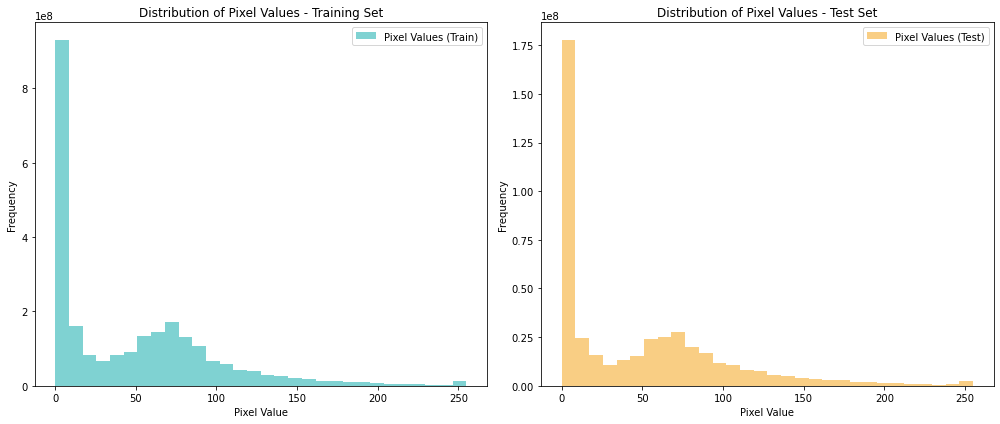

In [15]:
# Calculate pixel value distribution for the training set
train_pixel_values = np.concatenate([img.flatten() for img in train_images])

# Calculate pixel value distribution for the test set
test_pixel_values = np.concatenate([img.flatten() for img in test_images])

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Visualize pixel value distribution for the training set
ax1.hist(train_pixel_values, bins=30, alpha=0.5, color='#00A6A6', label='Pixel Values (Train)')
ax1.set_title('Distribution of Pixel Values - Training Set')
ax1.set_xlabel('Pixel Value')
ax1.set_ylabel('Frequency')
ax1.legend()

# Visualize pixel value distribution for the test set
ax2.hist(test_pixel_values, bins=30, alpha=0.5, color='#F49F0A', label='Pixel Values (Test)')
ax2.set_title('Distribution of Pixel Values - Test Set')
ax2.set_xlabel('Pixel Value')
ax2.set_ylabel('Frequency')
ax2.legend()

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()
